In [25]:
import numpy as np
import matplotlib.pyplot as plt

from CommonModules.LoadMagneticField import read
from CommonModules.BiSplineDer import UniBiSpline
from CommonModules.BiSplineDer import BiSpline
from CommonModules.PlasmaEquilibrium import IntSample

In [26]:
data_mag = read('StandardCases/AUG30907_0_72/input')
R, z, Bfield, psi, psi_sep = data_mag

In [27]:
R_1d = R[:, 0]
z_1d = z[0, :]

Apparently it's already stored in rho, not in psi!

In [28]:
Ne_dat = np.loadtxt('StandardCases/AUG30907_0_72/input/ne.dat', skiprows=1)
Ne, psi_Ne = Ne_dat[:, 1], Ne_dat[:, 0]
Te_dat = np.loadtxt('StandardCases/AUG30907_0_72/input/Te.dat', skiprows=1)
Te, psi_Te = Te_dat[:, 1], Te_dat[:, 0]

In [29]:
PsiInt = BiSpline(R_1d, z_1d, psi)

In [30]:
NeInt = UniBiSpline(psi_Ne, Ne, PsiInt)
TeInt = UniBiSpline(psi_Te, Te, PsiInt)

In [31]:
Ne2d = IntSample(R_1d, z_1d, NeInt.eval).T
Te2d = IntSample(R_1d, z_1d, TeInt.eval).T

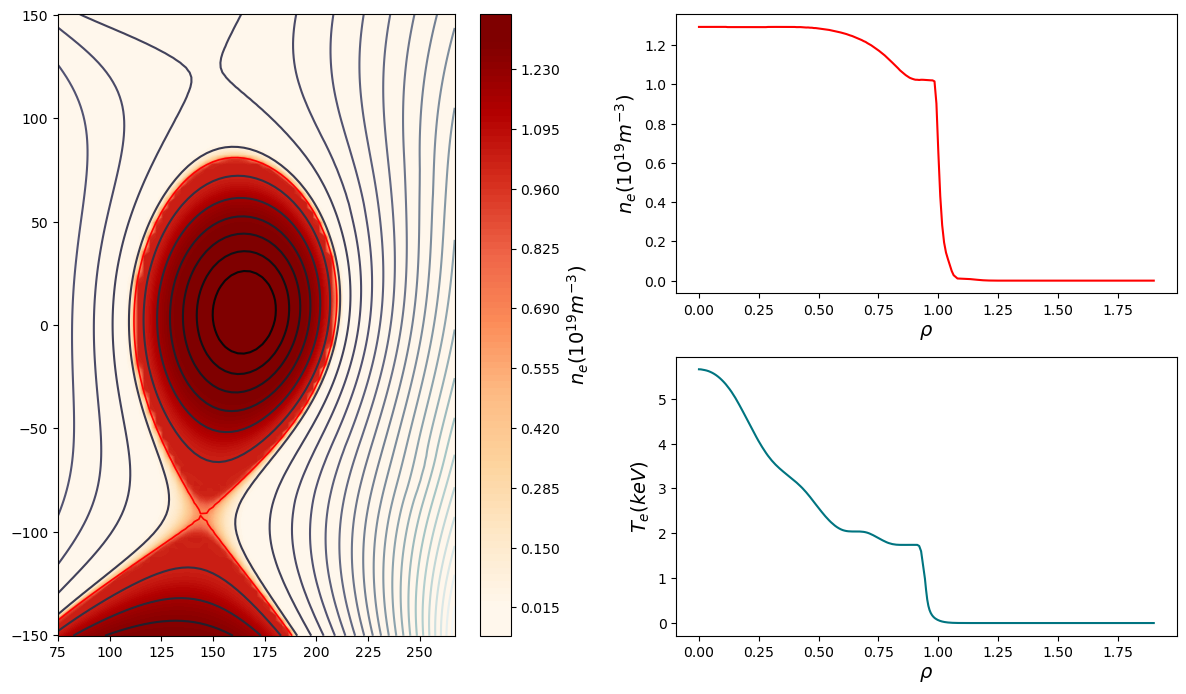

In [34]:
Temp = False

plt.figure(2, figsize=(12, 7))
ax1 = plt.subplot(121, aspect='equal')
if Temp:
    density = plt.contourf(R, z, Te2d, 100, extend='both', cmap='OrRd')
    cbar = plt.colorbar(density, ax=ax1, extendrect=True)
    cbar.set_label(label=r'$T_e (keV)$', fontsize=14)
else:
    density = plt.contourf(R, z, Ne2d, 100, extend='both', cmap='OrRd')
    cbar = plt.colorbar(density, ax=ax1, extendrect=True)
    cbar.set_label(label=r'$n_e (10^{19} m^{-3})$', fontsize=14)

mag_field = plt.contour(R, z, psi, 30, cmap=plt.cm.bone)
plt.contour(R, z, psi, [psi_sep], colors='r', linewidths=1.2)


ax2 = plt.subplot(222)
ax2.plot(psi_Ne, Ne, c='r')
ax2.set_xlabel(r'$\rho$', fontsize=14)
ax2.set_ylabel(r'$n_e (10^{19} m^{-3})$', fontsize=14 )

ax3 = plt.subplot(224)
ax3.plot(psi_Te, Te, c='#007480')
ax3.set_xlabel(r'$\rho$', fontsize=14)
ax3.set_ylabel(r'$T_e (keV)$', fontsize=14 )

plt.tight_layout()


plt.show()

